In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [319]:
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
members = pd.read_csv("members.csv", parse_dates=['MSMTDATE1'], date_parser=dateparse)


expeds = pd.read_csv("exped.csv",parse_dates=['SMTDATE'], date_parser=dateparse)

peaks = pd.read_csv("peaks.csv", low_memory=False)

In [304]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [9]:
deathsbytype = members.groupby(['DEATHTYPE']).size().reset_index(name='counts')

In [10]:
deathsbytype.to_csv("deathsbytype.csv")

In [11]:
members.loc[members['DEATH']==True].groupby(['PEAKID']).size().reset_index(name='counts')

,PEAKID,counts
0,AMAD,28
1,ANN1,71
2,ANN2,6
3,ANN3,9
4,ANN4,5
5,ANNE,1
6,ANNM,3
7,ANNS,8
8,APIM,4
9,BARU,13


In [320]:
members['month'] = members['MSMTDATE1'].dt.strftime('%m')

In [321]:
members['day'] = members['MSMTDATE1'].dt.strftime('%d')

In [15]:
membersbymonthday = members.loc[members['MSMTDATE1']!='1899-12-30 00:00:00'].groupby(['month','day']).size().reset_index(name='counts')

In [16]:
membersbymonthday.to_csv("membersbymonthday.csv")

In [310]:
members.loc[members['EXPID'] == 'EVER95305']

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
12276,EVER95305,4,EVER,1995,3,Yong-Il,Jo,M,0,12/30/1899,1968.0,26,S Korea,Climber,"Busan (Pusan), S Korea",Student,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1995-10-14,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,225,0,0,True,False,True,False,True,False,Used sleeping & climbing at & above C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2438143,10,14
12277,EVER95305,2,EVER,1995,3,Ho-Ki,Kang,M,0,12/30/1899,1941.0,54,S Korea,Deputy Leader,"Seoul, S Korea",Flowershop owner,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,19,0,2428042,1899-12-30 00:00:00,1899-12-30 00:00:00
12278,EVER95305,1,EVER,1995,3,Jong-Ho,Kim,M,0,12/30/1899,1955.0,40,S Korea,Leader,"Seoul, S Korea",Computer systems company executive,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,False,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,0,0,0,2433216,1899-12-30 00:00:00,1899-12-30 00:00:00
12279,EVER95305,5,EVER,1995,3,Seok-Bu,Lee,M,0,12/30/1899,1974.0,20,S Korea,Climber,"Chungnam, Jeollabuk, S Korea",Student,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8700,1995-10-09,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,4,10,0,2440374,10,09
12280,EVER95305,6,EVER,1995,3,Young-Il,Lim,M,0,12/30/1899,1968.0,27,S Korea,Climber,"Daejeon (Taejon), S Korea",Student,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,False,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,0,0,0,2437885,1899-12-30 00:00:00,1899-12-30 00:00:00
12281,EVER95305,3,EVER,1995,3,Dong-Seok,Park,M,0,12/30/1899,1965.0,30,S Korea,Deputy Leader,"Seoul, S Korea",Reporter,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,True,12/30/1899,NaN,10,0,Stomach perforation & appendicitis,NaN,NaN,1,9,0,2436876,1899-12-30 00:00:00,1899-12-30 00:00:00
12282,EVER95305,7,EVER,1995,3,Jae-Gyu,Song,M,0,12/30/1899,1964.0,31,S Korea,Climber,"Ulsan, S Korea",Personnel officer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,False,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,0,0,0,2436417,1899-12-30 00:00:00,1899-12-30 00:00:00
12283,EVER95305,8,EVER,1995,3,Shin-Ryul,You,M,0,12/30/1899,1967.0,28,S Korea,Climber,"Seoul, S Korea",Korea University a

In [306]:
members.loc[(members['MSUCCESS'] == True) & (members['DEATH'] == True) & (members['PEAKID'] == "EVER")]

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
8761,EVER79101,32,EVER,1979,1,Ang Phu,Sherpa,M,0,12/30/1899,1950.0,28,Nepal,Sirdar,"Khumjung, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,1979-05-15,12/30/1899,12/30/1899,1430.0,NaN,NaN,1,0,0,33,0,0,True,False,True,False,True,False,NaN,True,05/16/1979,730.0,4,7600,5,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,-2132,05,15
8764,EVER79301,4,EVER,1979,3,Raymond Edward (Ray),Genet,M,0,12/30/1899,1931.0,48,USA,Climber,"Talkeetna, Alaska",Alpine guide,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1979-10-02,12/30/1899,12/30/1899,1300.0,NaN,NaN,1,0,0,35,0,0,True,False,True,False,False,False,NaN,True,10/03/1979,NaN,2,8000,5,True,False,False,12/30/1899,NaN,0,0,Died of exhaustion and exposure in snow cave b...,NaN,NaN,5,1,0,2424431,10,02
8767,EVER79301,6,EVER,1979,3,Hannelore,Schmatz,F,0,12/30/1899,1940.0,39,W Germany,Climber,"Neu-Ulm, Bavaria, W Germany",Housewife,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1979-10-02,12/30/1899,12/30/1899,1300.0,NaN,NaN,1,0,0,35,0,0,True,False,True,False,False,False,NaN,True,10/03/1979,700.0,2,8350,5,False,False,False,12/30/1899,NaN,0,0,Died of exhaustion and exposure on descent (es...,NaN,NaN,5,1,0,2427550,10,02
9045,EVER82402,1,EVER,1982,4,Yasuo,Kato,M,0,12/30/1899,1949.0,33,Japan,Leader,"Omiya, Saitama, Japan",Businessman,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1982-12-27,12/30/1899,12/30/1899,1555.0,NaN,NaN,1,0,0,51,0,0,True,False,True,False,True,False,Used from 7400m upwards,True,12/28/1982,NaN,4,8800,5,False,True,False,12/30/1899,NaN,0,0,Disappeared - blown off by wind?,NaN,NaN,5,1,0,2430985,12,27
9135,EVER83306,3,EVER,1983,3,Hironobu,Kamuro,M,0,12/30/1899,1951.0,31,Japan,Climber,"Oguni, Kumamoto, Japan",Buddhist monk,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1983-10-08,12/30/1899,12/30/1899,1650.0,NaN,NaN,1,0,0,56,0,0,False,True,False,False,False,False,NaN,True,10/08/1983,1800.0,4,8800,5,False,False,False,12/30/1899,NaN,0,0,Fall? (disappeared) (JAC estimates 6 pm),NaN,NaN,5,1,0,2431916,10,08
9136,EVER83306,1,EVER,1983,3,Hiroshi,Yoshino,M,0,12/30/1899,1950.0,33,Japan,Leader,"Tokyo, Japan","Salesman, mountaineering equipment shop",True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1983-10-08,12/30/1899,12/30/1899,1650.0,NaN,NaN,1,0,0,56,0,0,False,True,False,False,False,False,NaN,True,10/09/1983,630.0,4,8800,5,False,False,False,12/30/1899,NaN,0,0,Fall? (disappeared) (JAC estimates 6 am after ...,NaN,NaN,5,1,0,2431300,10,08
9214,EVER84103,3,EVER,1984,1,Christo Ivanov,Prodanov,M,0,12/30/1899,1943.0,41,Bulgaria,Deputy Leader,"Sofia, Bulgaria",Metallurgical engineer,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1984-04-20,12/30/1899,12/30/1899,1815.0,NaN,NaN,1,0,0,59,0,0,False,True,False,False,False,False,NaN,True,04/21/1984,NaN,3,8600,5,False,False,False,12/30/1899,NaN,0,0,Exposure and exhaustion on descent from summit...,NaN,NaN,5,1,0,2428755,04,20
9300,EVER84306,17,EVER,1984,3,Jozef,Psotka,M,0,12/30/1899,193

In [324]:
summitanddiedtime = members.loc[(members['MSUCCESS'] == True) & (members['DEATH'] == True) & (members['PEAKID'] == "EVER") & (members['MSMTTIME1'].notnull())]

In [315]:
members.loc[12436]['MSMTTIME1'] = 1430

/Users/elbertwang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [325]:
summitanddiedtime.to_csv('summittimeanddied.csv')

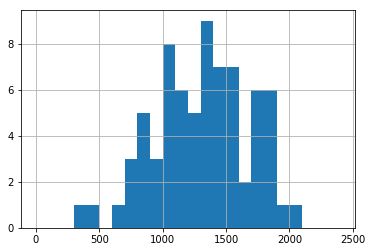

In [246]:
members.loc[(members['MSMTTIME1'].notnull()) & (members['DEATH'] == True) & (members['PEAKID'] == 'EVER')]['MSMTTIME1'].hist(bins=24,range=[0, 2400])

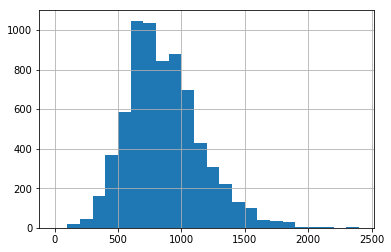

In [202]:
members.loc[(members['MSMTTIME1'].notnull()) & (members['MSUCCESS'] == True) & (members['PEAKID'] == 'EVER')]['MSMTTIME1'].hist(bins=24,range=[0, 2400])

In [214]:
summittimeanddied = members.loc[(members['MSMTTIME1'].notnull()) & (members['DEATH'] == True) & (members['PEAKID'] == 'EVER')]

In [248]:
summittimeanddied.loc[members['MYEAR'] == 1996]

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
12363,EVER96108,6,EVER,1996,1,Bruce,Herrod,M,0,12/30/1899,1958.0,37,UK,Climber,"London, England",Photographer & alpine guide,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-25,12/30/1899,12/30/1899,1700.0,NaN,NaN,1,0,0,245,0,0,True,False,True,False,True,False,NaN,True,05/25/1996,1800.0,4,8750,5,False,False,False,12/30/1899,NaN,0,0,Died at Hillary Step on descent (later found e...,NaN,NaN,5,1,0,2434290,05,25
12391,EVER96110,4,EVER,1996,1,Dorje Morup,NaN,M,0,12/30/1899,1948.0,47,India,Climber,"Skurbucham, Leh, Ladakh, India",ITBP personnel,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,1815.0,NaN,NaN,1,0,0,230,0,0,True,False,True,False,True,False,Above C2 at 7850m,True,05/11/1996,NaN,3,8680,5,False,True,False,12/30/1899,NaN,0,0,Died on descent below Second Step (last seen a...,NaN,NaN,5,1,0,2430756,05,10
12395,EVER96110,5,EVER,1996,1,Tsewang Paljor,NaN,M,0,12/30/1899,1968.0,28,India,Climber,"Sakti, Leh, Ladakh, J&K, India",ITBP personnel,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,1815.0,NaN,NaN,1,0,0,230,0,0,True,False,True,False,True,False,Above C2 at 7850m,True,05/11/1996,NaN,3,8550,5,False,True,False,12/30/1899,NaN,0,0,Died on descent below Second Step (last seen a...,NaN,NaN,5,1,0,2437867,05,10
12412,EVER96110,31,EVER,1996,1,Tsewang,Smanla,M,0,12/30/1899,1957.0,38,India,Climber,"Tia, Leh, Ladakh, J&K, India",ITBP personnel,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,1815.0,NaN,NaN,1,0,0,230,0,0,True,False,True,False,True,False,Above C2 at 7850m,True,05/11/1996,NaN,3,8700,5,False,True,False,12/30/1899,NaN,0,0,Died on descent above Second Step (last seen a...,NaN,NaN,5,1,0,2434017,05,10
12465,EVER96115,10,EVER,1996,1,Yasuko,Namba,F,0,12/30/1899,1949.0,47,Japan,Climber,"Tokyo, Japan",Federal Express,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,300.0,NaN,NaN,1,0,0,228,0,0,True,False,True,False,True,False,In & above C4,True,05/11/1996,300.0,3,7900,5,False,True,False,12/30/1899,NaN,0,0,Died at S Col during early morning hours of 11...,NaN,NaN,5,1,0,2430884,05,10


In [235]:
summittimeandsuccess = members.loc[(members['MSMTTIME1'].notnull()) & (members['MSUCCESS'] == True)  & (members['PEAKID'] == 'EVER') & (members['DEATH'] == False)]

In [236]:
summittimeandsuccess.to_csv('summittimeandsuccess.csv')

In [27]:
peaks['PYEAR']= peaks['PYEAR'].fillna(0).astype(int).astype(str)
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN


In [29]:
peaks['firstsummitdate'] =  pd.to_datetime(peaks['PSMTDATE'] + " " + peaks['PYEAR'], format='%b %d %Y', errors='ignore')

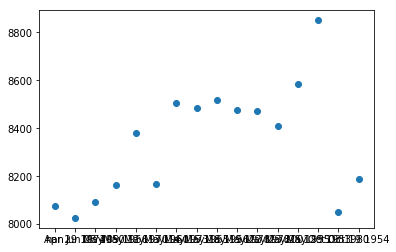

In [31]:
plt.scatter(peaks['firstsummitdate'].loc[peaks['HEIGHTM']>8000].tolist(), peaks['HEIGHTM'].loc[peaks['HEIGHTM']>8000])
plt.show()

In [33]:
unclimbed = peaks.loc[peaks['PSTATUS'] == 1]

In [34]:
climbed = peaks.loc[peaks['PSTATUS'] == 2]

In [37]:
climbed = peaks.loc[peaks['PSTATUS'] == 2]

In [39]:
peaks['firstsummitdate'] = pd.to_datetime(peaks['PSMTDATE'] + " " + peaks['PYEAR'], format='%b %d %Y', exact=False, errors='ignore')

In [43]:
datetime.strptime('Jun 03 1950', '%b %d %Y')

datetime.datetime(1950, 6, 3, 0, 0)

In [47]:
merged = expeds.merge(peaks, how='left', on="PEAKID")

In [49]:
merged['expeddate'] = pd.to_datetime(merged['SMTDATE'], '%Y-%m-%d')

In [50]:
merged = merged[pd.notnull(merged['SMTDATE'])]
merged['PYEAR'] = merged['PYEAR'].astype(int).astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9609 entries, 0 to 9608
Data columns (total 92 columns):
EXPID              9609 non-null object
PEAKID             9609 non-null object
YEAR               9609 non-null int64
SEASON             9609 non-null int64
HOST               9609 non-null int64
ROUTE1             9480 non-null object
ROUTE2             302 non-null object
ROUTE3             30 non-null object
ROUTE4             5 non-null object
NATION             9609 non-null object
LEADERS            9583 non-null object
SPONSOR            8785 non-null object
SUCCESS1           9609 non-null bool
SUCCESS2           9609 non-null bool
SUCCESS3           9609 non-null bool
SUCCESS4           9609 non-null bool
ASCENT1            2680 non-null object
ASCENT2            100 non-null object
ASCENT3            11 non-null object
ASCENT4            4 non-null object
CLAIMED            9609 non-null bool
DISPUTED           9609 non-null bool
COUNTRIES          3073 non-null object


In [51]:
merged['firstsummitdate'] = pd.to_datetime(merged['PSMTDATE'] + " " + merged['PYEAR'],errors="coerce")

In [53]:
beforesummit = merged.loc[merged['HEIGHTM'] > 8000].loc[((merged['expeddate'] <= merged['firstsummitdate']) & (merged['expeddate'] != datetime.strptime('1899-12-30 00:00:00', '%Y-%m-%d %H:%M:%S')))  | (merged['YEAR'] < merged['PYEAR'].astype(int))] 

In [54]:
beforesummit.to_csv("beforesummit.csv")

In [58]:
geocodedpeaks = pd.read_csv('geocodedpeaks.csv')

In [60]:
geocodedpeaks = geocodedpeaks.rename(columns = {'input_string':'PKNAME'})

In [62]:
mergedpeaks = peaks.merge(geocodedpeaks)

In [63]:
peaks.shape

(457, 26)

In [64]:
mergedpeaks.to_csv("geocodedpeaksfinal.csv")

In [65]:
gpf = pd.read_csv("geocodedpeaksfinal.csv")

In [69]:
eightthousanders = peaks.loc[peaks['HEIGHTM'] > 8000]['PEAKID']

In [70]:
expeds.shape

(9609, 66)

In [72]:
eightthousandermembers = members[members['PEAKID'].isin(eightthousanders)]

In [74]:
eightthousandermembers.loc[(eightthousandermembers['MSUCCESS'] == True) | (eightthousandermembers['DEATH'] == True)]

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
1369,ANN170101,2,ANN1,1970,1,Donald Desbrow (Don),Whillans,M,0,12/30/1899,1933.0,37,UK,Deputy Leader,"Rossendale, Lancashire, England","Plumber, lecturer & alpinist",False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8091,1970-05-27,12/30/1899,12/30/1899,1430.0,NaN,NaN,1,0,0,3,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2425276,05,27
1372,ANN170101,5,ANN1,1970,1,Ian Stewart,Clough,M,0,12/30/1899,1937.0,32,UK,Climber,"Glencoe, Argyll, Scotland",Director of Glencoe School of Mountaineering,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7315,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,True,05/30/1970,945.0,8,5300,6,False,False,False,12/30/1899,NaN,0,0,Killed by falling serac just below C2 shortly ...,NaN,NaN,1,15,0,-1939,1899-12-30 00:00:00,1899-12-30 00:00:00
1375,ANN170101,10,ANN1,1970,1,Dougal,Haston,M,0,12/30/1899,1942.0,28,UK,Climber,"Leysin, Vaud, Switzerland",Director of International School of Mountainee...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8091,1970-05-27,12/30/1899,12/30/1899,1430.0,NaN,NaN,1,0,0,3,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2428525,05,27
1383,ANN170102,2,ANN1,1970,1,M. W. Henry,Day,M,0,12/30/1899,1942.0,28,UK,Climbing Leader,"Knutsford, Cheshire, England",Captain,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8091,1970-05-20,12/30/1899,12/30/1899,1100.0,NaN,NaN,1,0,0,2,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2428515,05,20
1384,ANN170102,9,ANN1,1970,1,Gerald F. (Gerry),Owens,M,0,12/30/1899,1937.0,32,UK,Climber,"Malton, N Yorkshire, England","Infantry Training Centre, Royal Marines, Devon...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8091,1970-05-20,12/30/1899,12/30/1899,1100.0,NaN,NaN,1,0,0,2,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2426960,05,20
1400,ANN173101,9,ANN1,1973,1,Sadatoshi,Takahashi,M,0,12/30/1899,NaN,37,Japan,Climber,"Matsumoto, Nagano, Japan","Assistant manager, Nagano Mitsubishi Electric ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,True,05/18/1973,1130.0,7,6700,6,False,False,False,12/30/1899,NaN,0,0,Avalanche between C3 and C4,NaN,NaN,0,0,0,-62,1899-12-30 00:00:00,1899-12-30 00:00:00
1401,ANN173101,4,ANN1,1973,1,Masanori,Hama,M,0,12/30/1899,NaN,36,Japan,Climber,"Suwa, Nagano, Japan","Assistant manager, Suwa Seikosha Co. (watches)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,True,05/18/1973,1130.0,7,6700,6,False,False,False,12/30/1899,NaN,0,0,Avala

In [75]:
eightthousandermembers.to_csv('eightthousandersummitanddeaths.csv')

In [76]:
members.loc[members['RESIDENCE'].notnull()].shape

(64668, 76)

In [77]:
members.shape

(70133, 76)

In [78]:
members.loc[members['RESIDENCE'].notnull()].shape

(64668, 76)

In [79]:
geocodedresidences = pd.read_csv('geocodedmembers.csv')

In [92]:
geocodedresidences = geocodedresidences.rename(columns = {'RESIDENCE':'input_string'})

In [83]:
geocodedresidences.head()

,Unnamed: 0,accuracy,formatted_address,google_place_id,RESIDENCE,latitude,longitude,number_of_results,postcode,status,type
0,0,APPROXIMATE,"Argentière, 74400 Chamonix, France",ChIJn9yry7xMiUcRKy3DvNdKSSc,"Argentiere, Haute-Savoie, France",45.983986,6.926873,1,74400,OK,"political,sublocality,sublocality_level_1"
1,1,APPROXIMATE,"74310 Les Houches, France",ChIJI3AKp1JQiUcRcJ665CqrCAQ,"Les Houches, Haute-Savoie, France",45.890388,6.798735,1,74310,OK,"locality,political"
2,2,GEOMETRIC_CENTER,"Route de Troyes, 51120 Sézanne, France",ChIJfxmlQ28y6UcRmmPMtYAxKVs,"Troyes, Val-de-Marne, France",48.709951,3.732658,1,51120,OK,route
3,3,APPROXIMATE,"74400 Chamonix, France",ChIJ5y7-LQZMiUcRgKO65CqrCAQ,"Chamonix, Haute-Savoie, France",45.923697,6.869433,1,74400,OK,"locality,political"
4,4,APPROXIMATE,"74310 Les Houches, France",ChIJI3AKp1JQiUcRcJ665CqrCAQ,"Les Houches, Haute-Savoie, France",45.890388,6.798735,1,74310,OK,"locality,political"


In [84]:
mergedmembers = members[:1000].merge(geocodedresidences, how='left', on="RESIDENCE")

In [89]:
first1000members = members[:1000]

In [159]:
first1000members.head()

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
0,AMAD78301,1,AMAD,1978,3,Jean Robert,Clemenson,M,0,12/30/1899,1938.0,40,France,Leader,"Argentiere, Haute-Savoie, France",Alpine guide,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426937,1899-12-30 00:00:00,1899-12-30 00:00:00
1,AMAD78301,2,AMAD,1978,3,Bernard,Dufour,M,0,12/30/1899,1936.0,41,France,Deputy Leader,"Les Houches, Haute-Savoie, France",Alpine guide,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6000,1978-10-21,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426501,10,21
2,AMAD78301,3,AMAD,1978,3,Philippe,Gerard,M,0,12/30/1899,1950.0,27,France,Climber,"Troyes, Val-de-Marne, France",Professional photographer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2431569,1899-12-30 00:00:00,1899-12-30 00:00:00
3,AMAD78301,4,AMAD,1978,3,Eric,Lasserre,M,0,12/30/1899,1937.0,40,France,Exp Doctor,"Chamonix, Haute-Savoie, France",Physician,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6000,1978-10-21,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426809,10,21
4,AMAD78301,5,AMAD,1978,3,Guy,Peters,M,0,12/30/1899,1944.0,34,France,Climber,"Les Houches, Haute-Savoie, France",Alpine guide,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2429215,1899-12-30 00:00:00,1899-12-30 00:00:00


In [90]:
members.loc[members['PEAKID'] == 'EVER'].shape

(19554, 76)

In [93]:
mergedmembers = first1000members.join(geocodedresidences)

In [95]:
mergedmembers.shape

(1000, 87)

In [96]:
mergedmembers.to_csv('geocodedmemberstest.csv')

In [97]:
everestmembers = members.loc[members['PEAKID'] == 'EVER']

In [98]:
everestmembers.shape

(19554, 76)

In [102]:
successmembers = members.loc[(members['MSUCCESS'] == True) & (members['PEAKID'] == 'EVER')]

In [103]:
successmembers.shape

(8219, 76)

In [104]:
members.shape

(70133, 76)

In [111]:
successmembers['MYEAR'].min()

1953

In [180]:
successmembers = successmembers.reset_index()

In [161]:
successmembers.to_csv('successeverest.csv')

In [286]:
successmembers4400 = successmembers[4400:]

In [287]:
successmembers4400.head()

,index,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
4400,48542,EVER09168,53,EVER,2009,1,Nuru Gyalzen,Sherpa,M,0,12/30/1899,1973.0,35,Nepal,H-A Worker,"Phortse, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,730.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2439758,05,21
4401,48543,EVER09168,55,EVER,2009,1,Pasang Nima,Sherpa,M,0,12/30/1899,1992.0,16,Nepal,H-A Worker,"Phortse, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,733.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2446723,05,21
4402,48544,EVER09168,60,EVER,2009,1,Son Dorje,Sherpa,M,0,12/30/1899,1963.0,45,Nepal,H-A Worker,"Phortse, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,740.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2436027,05,21
4403,48545,EVER09168,47,EVER,2009,1,Nima,Sherpa,M,0,12/30/1899,1989.0,19,Nepal,H-A Worker,"Khunde, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,850.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2445505,05,21
4404,48546,EVER09168,63,EVER,2009,1,Tshering Tashi,Sherpa,M,0,12/30/1899,1980.0,29,Nepal,H-A Worker,"Khunde, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-23,12/30/1899,12/30/1899,922.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2442198,05,23


In [288]:
successmembers4400.head().reset_index()

,level_0,index,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
0,4400,48542,EVER09168,53,EVER,2009,1,Nuru Gyalzen,Sherpa,M,0,12/30/1899,1973.0,35,Nepal,H-A Worker,"Phortse, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,730.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2439758,05,21
1,4401,48543,EVER09168,55,EVER,2009,1,Pasang Nima,Sherpa,M,0,12/30/1899,1992.0,16,Nepal,H-A Worker,"Phortse, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,733.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2446723,05,21
2,4402,48544,EVER09168,60,EVER,2009,1,Son Dorje,Sherpa,M,0,12/30/1899,1963.0,45,Nepal,H-A Worker,"Phortse, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,740.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2436027,05,21
3,4403,48545,EVER09168,47,EVER,2009,1,Nima,Sherpa,M,0,12/30/1899,1989.0,19,Nepal,H-A Worker,"Khunde, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,850.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2445505,05,21
4,4404,48546,EVER09168,63,EVER,2009,1,Tshering Tashi,Sherpa,M,0,12/30/1899,1980.0,29,Nepal,H-A Worker,"Khunde, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-23,12/30/1899,12/30/1899,922.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2442198,05,23


In [290]:
successmembers4400.to_csv('pt3.csv')

In [222]:
geocodedsuccess1 = pd.read_csv('geocodedsuccesseverest.csv')

In [223]:
geocodedsuccess1.shape

(4400, 11)

In [224]:
geocoded1 = successmembers4400.join(geocodedsuccess1)

In [225]:
geocoded1.shape

(4400, 88)

In [226]:
geocoded1.head()

,index,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day,Unnamed: 0,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,status,type
0,8305,EVER63101,4,EVER,1963,1,Barry Chapman,Bishop,M,0,12/30/1899,1932.0,31,USA,Climber,"Washington, DC","Photographer & geographer, National Geographic...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1963-05-22,12/30/1899,12/30/1899,1530.0,NaN,NaN,1,0,0,6,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2424726,05,22,0,APPROXIMATE,"Washington, DC, USA",ChIJW-T2Wt7Gt4kRKl2I1CJFUsI,"Washington, DC",38.907192,-77.036871,1,NaN,OK,"locality,political"
1,8312,EVER63101,10,EVER,1963,1,Thomas Frederick,Hornbein,M,0,12/30/1899,1930.0,32,USA,Climber,"San Diego, California",Physician (anesthesiologist),False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,8850,1963-05-22,12/30/1899,12/30/1899,1830.0,NaN,NaN,2,0,0,7,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2424295,05,22,1,APPROXIMATE,"San Diego, CA, USA",ChIJSx6SrQ9T2YARed8V_f0hOg0,"San Diego, California",32.715738,-117.161084,1,NaN,OK,"locality,political"
2,8313,EVER63101,11,EVER,1963,1,Luther Gerald (Lute),Jerstad,M,0,12/30/1899,1936.0,26,USA,Climber,"Eugene, Oregon","Speech instructor, University of Oregon alpine...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1963-05-22,12/30/1899,12/30/1899,1530.0,NaN,NaN,1,0,0,6,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2426319,05,22,2,APPROXIMATE,"Eugene, OR, USA",ChIJGRlQrLAZwVQRTYlDSolh7Fc,"Eugene, Oregon",44.052069,-123.086754,1,NaN,OK,"locality,political"
3,8322,EVER63101,19,EVER,1963,1,William Francis (Willi),Unsoeld,M,0,12/30/1899,1926.0,36,USA,Climber,"Corvallis, Oregon","University professor of philosophy & religion,...",False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,8850,1963-05-22,12/30/1899,12/30/1899,1830.0,NaN,NaN,2,0,0,7,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2422806,05,22,3,APPROXIMATE,"Corvallis, OR, USA",ChIJfdcUqp1AwFQRvsC9Io-ADdc,"Corvallis, Oregon",44.564566,-123.262044,1,NaN,OK,"locality,political"
4,8323,EVER63101,20,EVER,1963,1,James W. (Jim),Whittaker,M,0,12/30/1899,1929.0,34,USA,Climber,"Redmond, Washington","Manager, Recreational Equipment Inc, Seattle r...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1963-05-01,12/30/1899,12/30/1899,1300.0,NaN,NaN,1,0,0,5,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2423662,05,01,4,APPROXIMATE,"Redmond, WA, USA",ChIJI-4AIK0MkFQR8gTYxeqQA14,"Redmond, Washington",47.673988,-122.121512,1,NaN,OK,"locality,political"


In [227]:
geocoded1.to_csv('geocodedeverest.csv')

In [194]:
everestbymonthday = members.loc[(members['MSMTDATE1']!='1899-12-30 00:00:00') & (members['PEAKID'] == 'EVER')].groupby(['month','day']).size().reset_index(name='counts')

In [195]:
everestbymonthday.to_csv("everestbymonthday.csv")

In [196]:
everestbymonthday.head()

,month,day,counts
0,01,02,1
1,01,08,2
2,01,10,4
3,01,12,1
4,01,13,2


In [208]:
successmembers.shape

(8219, 77)

In [209]:
pt2 = successmembers[2000:]

In [211]:
pt2.to_csv('pt2.csv')

In [237]:
toshrink = pd.read_csv('geocodedpeaksfinal2.csv')

In [238]:
toshrink.head()

,Unnamed: 0,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,firstsummitdate,Unnamed: 0.1,accuracy,formatted_address,google_place_id,latitude,longitude,number_of_results,postcode,status,type
0,0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN,Mar 13 1961,0,APPROXIMATE,"Ama Dablam, Khumjung 56000, Nepal",ChIJPSR3_fQA6TkRCwmkOk-rmqE,27.861875,86.861163,1,56000,OK,"establishment,natural_feature"
1,1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN,Apr 11 1953,1,NaN,NaN,NaN,27.878611,86.871389,0,NaN,ZERO_RESULTS,NaN
2,2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN,Jun 03 1950,2,APPROXIMATE,"Annapurna, Narchyang, Nepal",ChIJ94QfBUQcvjkR-zkLX9K-HJQ,28.596111,83.820278,1,NaN,OK,"establishment,natural_feature"
3,3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960,3,APPROXIMATE,"Annapurna II, Pisang 33500, Nepal",ChIJ_RjyDu6HlTkR57RJ_hTlGtA,28.535000,84.122500,1,33500,OK,"establishment,natural_feature"
4,4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN,May 06 1961,4,APPROXIMATE,"Annapurna III, Machhapuchchhre 33700, Nepal",ChIJaRhQjuEgvjkRncMG76M7Y1M,28.585000,83.990833,1,33700,OK,"establishment,natural_feature"


In [243]:
shrunk = toshrink.filter(items=['PKNAME', 'LOCATION', 'HEIGHTM', 'HIMAL', 'PYEAR', 'PSUMMITERS', 'firstsummitdate', 'latitude', 'longitude'])

In [244]:
shrunk.to_csv('geocodedpeaks.csv')

In [255]:
members['OCCUPATION'].unique()

array(['Alpine guide', 'Professional photographer', 'Physician', ...,
       'Retired soldier, now raw materials business owner',
       'Teacher for engineer trades', 'Tourism and hospitality manager'], dtype=object)

In [259]:
occupationcount = members['OCCUPATION'].value_counts()

In [260]:
occupationcount.to_csv('occupationcount.csv')

In [263]:
expeds['hiredratio'] = expeds['TOTHIRED'] / expeds['TOTMEMBERS'] 

In [280]:
successexpeds = expeds.loc[(expeds['SUCCESS1'] == True) & (expeds['PEAKID'] == 'EVER') & (expeds['AGENCY'].notnull())]

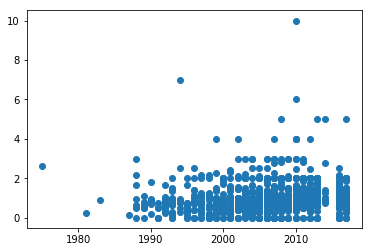

In [283]:
plt.scatter(successexpeds['YEAR'], successexpeds['hiredratio'])

In [281]:
successexpeds.head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM,hiredratio
461,EVER87402,EVER,1987,4,1,S Col-SE Ridge,NaN,NaN,NaN,S Korea,Hahm Tak-Young,Korean Winter Everest Expedition,True,False,False,False,75th,NaN,NaN,NaN,False,False,NaN,NaN,11/30/1987,1987-12-22,1420.0,22,23,12/23/1987,1,NaN,8850,False,False,False,4,0,9,1,0,1,1,0,False,True,False,True,False,True,False,False,False,NaN,"BC(30/11,5350m),C1(04/12,6100m),C2(07/12,6600m...",NaN,2 Sherpas ill (one after 4-5 days at BC) and s...,NaN,Adventure Nepal,True,True,False,False,False,NaN,2449274,0.111111
462,EVER88104,EVER,1988,1,1,S Col-SE Ridge,NaN,NaN,NaN,Australia,Austin Brookes,Australian Everest - Spring 1988,True,False,False,False,"80th,81th",NaN,NaN,NaN,False,False,New Zealand,NaN,03/12/1988,1988-05-25,1230.0,74,0,12/30/1899,1,NaN,8850,False,False,False,3,0,25,3,0,0,0,0,True,True,False,True,False,True,False,False,False,NaN,"BC(12/03,5400m),C1(26/03,5900m),C2(04/04,6500m...",NaN,Nothing serious,1st successful south side expedition without c...,Mountain Travel,True,True,False,False,False,NaN,2449430,0.000000
472,EVER89308,EVER,1989,3,1,S Col-SE Ridge,NaN,NaN,NaN,Japan,Ken Kanazawa,Kathmandu Club Autumn 1989 Everest Expedition,True,False,False,False,97th,NaN,NaN,NaN,False,False,NaN,NaN,08/25/1989,1989-10-13,1230.0,49,0,12/30/1899,1,NaN,8850,False,False,False,4,0,24,3,0,16,2,0,False,True,False,True,False,True,False,False,False,NaN,"BC(25/08,5350m),C1(03/09,6050m),C2(09/09,6450m...",NaN,Kurotaki frostbitten fingers (1 may be bad),NaN,Cosmo Treks,True,True,False,False,False,NaN,2449937,0.666667
473,EVER89312,EVER,1989,3,1,S Pillar-SE Ridge,NaN,NaN,NaN,S Korea,Kim In-Tae,Kim In-Tae Autumn 1989 Everest Expedition,True,False,False,False,98th,NaN,NaN,NaN,False,False,NaN,NaN,09/03/1989,1989-10-13,1230.0,40,0,12/30/1899,1,NaN,8850,False,False,False,4,0,16,1,0,9,0,0,False,True,False,True,False,False,False,False,False,NaN,"BC(03/09,5400m),C1(04/09,6200m),C2(07/09,6400m...",NaN,Park Hee-Taek frostbitten toes that will heal ...,NaN,Asian Trekking,False,False,False,False,False,NaN,2449937,0.562500
474,EVER89309,EVER,1989,3,1,S Col-SE Ridge,NaN,NaN,NaN,Mexico,Carlos Carsolio Carrea,Carlos Carsolio Carrea Autumn 1989 Everest Exp...,True,False,False,False,99th,NaN,NaN,NaN,False,False,NaN,NaN,08/31/1989,1989-10-13,1235.0,43,48,10/18/1989,1,NaN,8850,False,False,False,3,0,4,1,0,2,0,0,False,True,False,False,False,True,False,False,False,NaN,"BC(31/08,5350m),C1(05/09,6250m),C2(11/09,7300m...",NaN,Luengo and Elsa bleeding from cold wind blowin...,NaN,Asian Trekking,True,True,False,False,False,NaN,2449937,0.500000


In [282]:
successexpeds.shape

(1096, 67)

In [284]:
expeds['ROUTE1'].value_counts()

SW Ridge                                          1309
S Col-SE Ridge                                    1003
NW side                                            999
NE Face                                            567
N Col-NE Ridge                                     433
NE Ridge                                           385
W Face                                             367
SE Ridge                                           352
Makalu La-NW Ridge                                 243
N Face                                             213
NW Ridge                                           187
N Col-N Ridge                                      187
SW Face                                            165
W Ridge                                            160
S Face                                             126
S Ridge                                            112
N Ridge                                             80
SE Face                                             70
W Ridge-W 

In [ ]:
successmemberspt3 = successmembers[4400:]

In [ ]:
successmemberspt3.head()